

# Machine Learning

## Supervised Learning

### Project: Finding Donors for CharityML

>Version: Python 2.7.14

>Completed: 25 November 2017



### Getting Started

In this project, I will employ several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. My goal with this implementation is to construct a model that accurately predicts whether an individual makes more than `$`50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.
The dataset for this project originates from the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online(https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

### Exploring the Data

Loading necessary Python libraries and the census data. The last column from this dataset, 'income', will be our target label (whether an individual makes more than, or at most, `$`50,000 annually). All other columns are features about each individual in the census database.

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


(45222, 14)
income
<=50K    34014
>50K     11208
dtype: int64


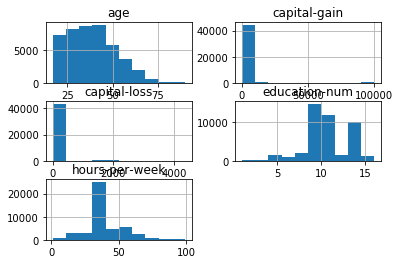

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Load libraries
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first two records
display(data.head(n=3))

# shape / dimensions of the dataset: how many datapoints/records (rows) and how many features (columns)
print(data.shape)

# target feature distribution
print(data.groupby('income').size())

# histograms for numerical datapoints only
data.hist()
plt.show()



### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than `$`50,000. In the code cell below, I will compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than `$`50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \`$`50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \`$`50,000 annually, `'greater_percent'`.

I may need to look at the table above to understand how the `'income'` entries are formatted. 

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


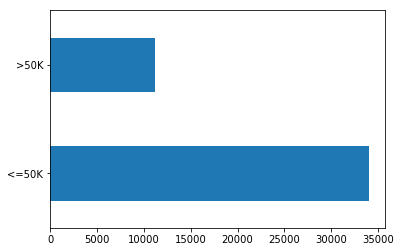

In [2]:
# TODO: Total number of records
n_records = len(data)

#use the value_counts method to get label counts
n_at_most_50k, n_greater_50k = data.income.value_counts()

#plot bar charts
data['income'].value_counts().plot(kind='barh')

# TODO: Number of records where individual's income is more than $50,000
#n_greater_50k = len(data[data.income==">50K"])

# TODO: Number of records where individual's income is at most $50,000
#n_at_most_50k = len(data[data.income=="<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (float(n_greater_50k)/float(n_records))*100.0

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

## Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'.
Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

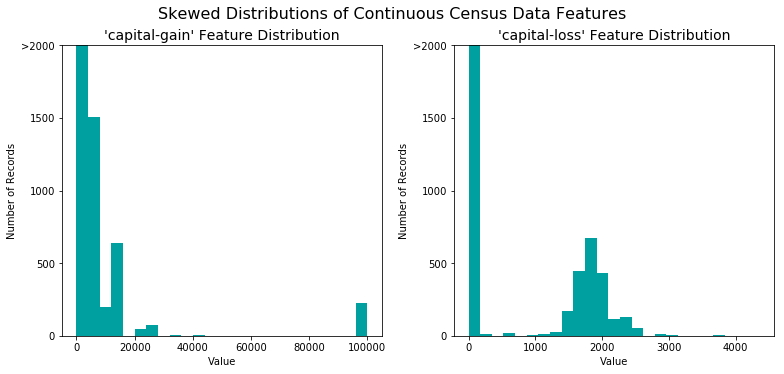

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Performing a transformation on the data and visualizing the results. Observing the range of values and how they are distributed. 

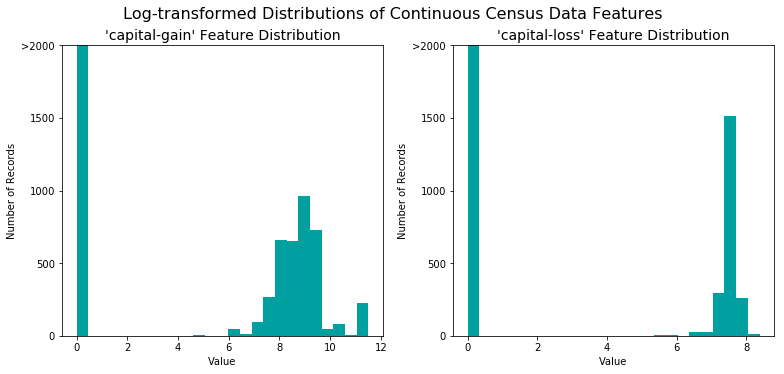

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Converting the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)['>50K']

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


>Shuffle and Split Data
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.
Performing the split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])



Training set has 36177 samples.
Testing set has 9045 samples.


/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a naive predictor.

>Metrics and the Naive Predictor
CharityML, equipped with their research, knows individuals that make more than `$`50,000 are most likely to donate to their charity. Because of this, CharityML is particularly interested in predicting who makes more than `$`50,000 accurately. It would seem that using accuracy as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that does not make more than `$`50,000 as someone who does would be detrimental to CharityML, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than `$`50,000 is more important than the model's ability to recall those individuals. We can use F-beta score as a metric that considers both precision and recall:
Fβ=(1+β2)⋅precision⋅recall(β2⋅precision)+recall
 
In particular, when  β=0.5
 , more emphasis is placed on precision. This is called the F 0.5
  score (or F-score for simplicity).
Looking at the distribution of classes (those who make at most `$`50,000, and those who make more), it's clear most individuals do not make more than `$`50,000. This can greatly affect accuracy, since we could simply say "this person does not make more than `$`50,000" and generally be right, without ever looking at the data! Making such a statement would be called naive, since we have not considered any information to substantiate the claim. It is always important to consider the naive prediction for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than `$`50,000, CharityML would identify no one as donors.
Note: Recap of accuracy, precision, recall
Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).
Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of
[True Positives/(True Positives + False Positives)]
Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of
[True Positives/(True Positives + False Negatives)]
For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).


Question 1 - Naive Predictor Performace
If we chose a model that always predicted an individual made more than `$`50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.
HINT:
When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total.
Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (true positives + true negatives)/(true positives + true negatives + false positives + false negatives)
accuracy = correct predictions/total predictions
accuracy = precision (in our case)
precision = true positives / (true positives + false positives)
recall = true positives / (true positives + false negatives) = 1          because FN = 0
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0

accuracy = float(TP + TN)/(TP + TN + FP + FN)
recall = float(TP) / (TP + FN)
precision = float(TP) / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = (1 + 0.5**2) * ((precision * recall)/(0.5**2 * (precision * recall) + 1))

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)
print "Naive Predictor: [Recall score: {:.4f}, Precision score: {:.4f}]".format(recall, precision)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
Naive Predictor: [Recall score: 1.0000, Precision score: 0.2478]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

>Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
Describe one real-world application in industry where the model can be applied.
What are the strengths of the model; when does it perform well?
What are the weaknesses of the model; when does it perform poorly?
What makes this model a good candidate for the problem, given what you know about the data?


**Answer:

Our dataset is unbalanced because the target feature "individuals making more than 50K" is related to only 24.78% of datapoints.
The dataset can be considered to be medium size because it consists of 45222 datapoints. The dataset has a nonlinear structure because datapoints do not form a sequence.

The three supervised learning models that are appropriate for this problem, given what I know about the data, are:

    ●Decision Trees 
    ●Gaussian Naive Bayes (GaussianNB)
    ●Ensemble Method (Random Forest)
    
    
### DECISION TREES

Real-world application:
    •detecting spam email messages based on words in the text.
    
The strengths:
    •performs feature selection,
    •not sensitive to missing values and outliers,
    •clarity of interpretation,
    •also quite fast,would work even without applying the one-hot encoding on the data set, 
    
The weaknesses:
    •easily overfits (without limiting tree growth would overfit training data),
    •"the fragmentation problem: as each split is made, the data is split based on the test and after two dozen levels there is usually very little data on which to base decisions"[1].
    
Why this model is a good candidate:
    •Decision Trees model clearly shows the statistical relationship between different features and the predictive capability.
    •The model selects important features.
    •The model is robust and skew-insensitive.
    
What characteristics of the data makes the model appropriate:
    •Our dataset is imbalanced, and Decision Trees model performs well on imbalanced datasets.
    •Decision Tree Classifier is best suited when the target has disctrete output, and this is what is needed in our case. Because our response variable has only two categories - "yes" or "no" (to accurately classify whether an individual makes more than 50K or not).
    
    
### GAUSSIAN NAIVE BAYES (GAUSSIAN NB)

Real-world application:
    •classifying text, spam filtering.
    
The strengths:
    • able to update knowledge step by step with new information,
    •"very robust to irrelevant attributes"[1],
    •"shown to be surprisingly accurate on many classification tasks even when the conditional independence assumption on which they are based is violated"[1],
    •"when assumption of independence holds, a Naive Bayes classifier performs better compare to other models"[14].
    
The weaknesses:
    • can not learn interactions between features,
    •"assumes that numerical features follow a normal (Gaussian) distribution"[14],
    •"require making strong (Naive) independence assumptions"[1], 
    •"in some larger databases, the accuracy of Naive-Bayes does not scale up as well as decision trees"[1].
    
Why this model is a good candidate:
    •Gaussian Naive Bayes model is accurate on classification of data.
    •Gaussian Naive Bayes model has high training and testing speed.
    •Gaussian Naive Bayes model adapts quickly to the changes in the data set, it performs well on dynamic data.
    •"It performs well in case of categorical input variables compared to numerical variables."[14]
    
What characteristics of the data makes the model appropriate:
    •Our dataset features are independent. Gaussian Naive Bayes model performs well when features which describe the datapoints are independent.
    •Gaussian Naive Bayes model is particularly efficient in solving classification problems when we have moderate training dataset and datapoints with several features. 
    
    
### ENSEMBLE METHOD (RANDOM FOREST)

Real-world application:
    •colorectal cancer detection based on the results of patients blood plazma samples.
    
The strengths:
    •finds best split randomly,
    •can deal with missing values,
    •can work with categorical values,
    •has many parameters and great flexibility,
    •more powerful and versatile algorithm than NB,
    •"ensemble-based classifiers try to improve the performance of single classifiers by inducing several classifiers and combining them to obtain a new classifier that outperforms every one of them"[11].
    
The weaknesses:
    •the model has to be rebuild every time something changes,
    •slow,
    •doesn't describe relationships in data.
    
Why this model is a good candidate:
    •Random Forest model has a lot of parameters to tune and to improve the predictive capability.
    •Random Forest model more resistant to overfitting than a decision tree.
    •Ensemble-based classifier outperforms single classifier.
    •"Implicit feature selection as it gives estimates on what variables are important in the classification."[15]
    
What characteristics of the data set makes the model appropriate:
    • Our dataset is not small (45222 datpoints). Random Forest model has a high classification accuracy when dealing with large datasets.
    • Our dataset 103 features after one-hot encoding. Random Forest model identifies well which features provide the most predictive power. This characteristic makes the model appropriate for classification task.
    • Our dataset shows a non-linear behavior, and Random Forest model performs well in discovering non-linear dependencies.
    
REFERENCES
[1] The Accuracy of Naive-Bayes Classifiers: https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf
[2] Decision Tree: https://www.quora.com/What-is-an-intuitive-explanation-of-a-decision-tree
[3] Random Forest: https://www.quora.com/How-does-randomization-in-a-random-forest-work
[4] Random Forest: http://blog.yhat.com/posts/python-random-forest.html
[5] Machine Learning Map: http://scikit-learn.org/stable/tutorial/machine_learning_map/
[6] Machine Learning Mastery: https://machinelearningmastery.com
[7] Choosing a Machine Learning Classifier: http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/
[8] Disadvantages of Naive Bayes: https://www.researchgate.net/post/What_are_the_disadvantages_of_Naive_Bayes
[9] Machine Learning Algorithms: https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/
[10] Machine Learning Algorithms: https://elitedatascience.com/machine-learning-algorithms
[11] Ensemble methods: https://pdfs.semanticscholar.org/ca9e/f070d2a424b344b814de1196520da2f34ad7.pdf
[12] Properties of Naive Bayes: https://nlp.stanford.edu/IR-book/html/htmledition/properties-of-naive-bayes-1.html
[13] Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
[14] Naive Bayes explained: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
[15] 10 Machine Learning Algorithms: https://www.dezyre.com/article/top-10-machine-learning-algorithms/202

**

>Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model I've chosen, it's important that I create a training and predicting pipeline that allows me to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. My implementation here will be used in the following section. In the code block below, I will need to implement the following:
Import fbeta_score and accuracy_score from sklearn.metrics.
Fit the learner to the sampled training data and record the training time.
Perform predictions on the test data X_test, and also on the first 300 training points X_train[:300].
Record the total prediction time.
Calculate the accuracy score for both the training subset and testing set.
Calculate the F-score for both the training subset and testing set.
Set the beta parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, I will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on algorithm, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


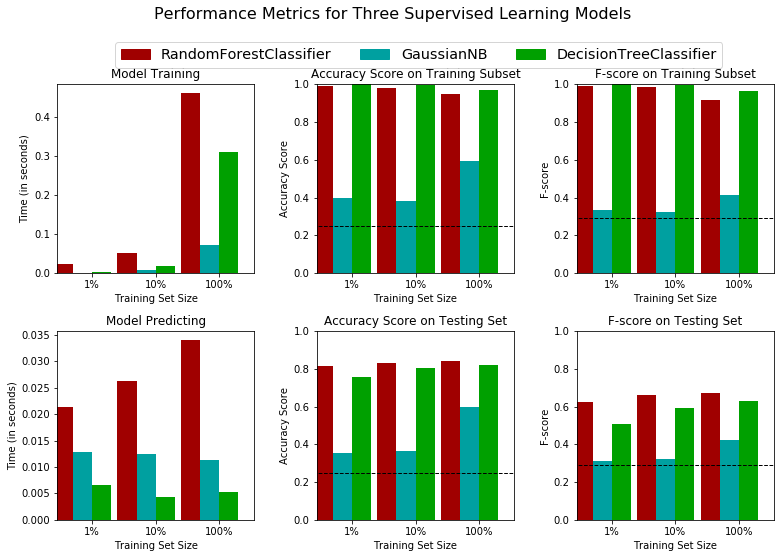

In [10]:
import pandas
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# TODO: Import the three supervised learning models from sklearn

# from sklearn import model_A - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# from sklearn import model_B - Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# from sklearn import model_C - Random Forest Classifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 543)
clf_B = GaussianNB()
clf_C = RandomForestClassifier(random_state = 543)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(X_train)
samples_10 = len(X_train)/10
samples_1 = len(X_train)/100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)


## Improving Results
In this final section, I will choose from the three supervised learning models the *best* model to use on the student data. I will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

>Question 3 - Choosing the Best Model


**Answer:
Decision Tree Classifier
metrics - F score on the testing when 100% of the training data is used - 0.6,
prediction/training time - 0.3 / 0.005 (in seconds)
the algorithm's suitability for the data - not the best but suitable algorithm for our dataset according the high result from F score and low prediction/training time
Gaussian NB
metrics - F score on the testing when 100% of the training data is used - 0.45,
prediction/training time - 0.011 / 0.1 (in seconds)
the algorithm's suitability for the data - not suitable algorithm for our data according very low F score
Random Forest
metrics - F score on the testing when 100% of the training data is used - 0.65,
prediction/training time - 0.034 / 0.41 (in seconds)
the algorithm's suitability for the data - the best suitable algorithm for our dataset according the highest F score
**

Question 4 - Describing the Model in Layman's Terms


![alt text](2.png)
[1] Random Forest Algorithm https://www.linkedin.com/pulse/random-forest-algorithm-interactive-discussion-niraj-kumar/

**Answer:
Random Forest Classifier model has achieved the best classification performance in our case. This model appears to be the most appropriate based on imbalanced data and skewed data distribution. Random Forest Classifier gave us the best F1 Score comparing to other two classifiers - Gaussian Naive Bayes and Decision Tree. It takes longer to train and to test Random Forest Classifier, but considering not very large size of our dataset, the time delay is not important this time.
As it can be seen on the "Random Forest Simplified" picture above, Random Forest consists of Decision Trees. Decision Tree built by repetative partitioning the data into segments. The data gets divided according the choosen condition. After Decision Tree is built, data classification is executed. Decision Tree shows excellent accuracy in predicting, identifying what class new datapoint belongs in. Random Forest Classifier makes prediction based on the output, the prediction that appears the most often in the most of Decision Trees.
In our particular case of Finding Donors, Random Forest Classifier is an ensemble method that uses many single Decision Trees Classifiers to determine and to assess whether an individual makes more than 50K or not. A single Decision Tree Classifier uses features describing previous individuals who already made more than 50K(for example, age, education level, relationship status, work class, etc) to make predictions. In our case there are 103 features on which Decision Tree Classifier rules and conditions can be formed. The Random Forest Classifier builds many Decision Trees Classifiers using samples of data. To predict whether a new individual will make more than 50K or not, the Random Forest Classifier looks at that individual's information (datapoint features) and makes a prediction using each single Decision Tree Classifier. For example, if our Random Forest have 10 Decision Trees, and 8 of them predict that individual in question "makes more than 50K" and 2 predict that this individual "doesn't make more than 50K", then Random Forest will predict that the individual "makes more than 50K'.

>Implementation: Model Tuning
Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. I will need to use the entire training set for this. In the code cell below, I will need to implement the following:
Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
Initialize the classifier you've chosen and store it in clf.
Set a random_state if one is available to the same state you set before.
Create a dictionary of parameters you wish to tune for the chosen model.
Example: parameters = {'parameter' : [list of values]}.
Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
Use make_scorer to create an fbeta_score scoring object (with  β=0.5
 ).
Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.
Note: Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the classifier
clf = RandomForestClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[10, 50, 60],
              'min_samples_leaf':[1, 10, 50],
              'random_state':[None, 543, 600]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = grid_search.GridSearchCV(clf, parameters, scoring=scorer, n_jobs=1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

# display Optimized Model
print "\n------"
print best_clf



/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8402
F-score on testing data: 0.6777

Optimized Model
------
Final accuracy score on the testing data: 0.8568
Final F-score on the testing data: 0.7235

------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=600,
            verbose=0, warm_start=False)


### Question 5 - Final Model Evaluation

* What is my optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from my optimized model compare to the naive predictor benchmarks I found earlier in **Question 1**?_  


#### Results:

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
Naive Predictor: [Recall score: 1.0000, Precision score: 0.2478]

Unoptimized model
------
Accuracy score on testing data: 0.8359
F-score on testing data: 0.6676

Optimized Model
------
Final accuracy score on the testing data: 0.8568
Final F-score on the testing data: 0.7235


|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |   0.2478            |    0.8359         |   0.8568        |
| F-score        |   0.2917            |    0.6676         |   0.7235        |



**Answer:
The result from my optimized model is significantly better than the result from the naive benchmarks. The result from the optimized model is well improved compared to the results from the unoptimized mode. The conclusion is to use the optimized model for our predictions.
**

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \`$`50,000.


### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do I believe to be most important for prediction, and in what order would I rank them and why?

**Answer:
My intuition is that the following five features are the most important for predictions :
education-num: Number of educational years completed
education_level: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
capital-gain: Monetary Capital Gains
capital-loss: Monetary Capital Losses
workclass: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
My intuition is that More Education = More Income. "Those holding bachelor's degrees earn about `$`2.27 million over their lifetime, while those with master's, doctoral, and professional degrees earn `$`2.67 million, `$`3.25 million, and `$`3.65 million, respectively." (https://www.usnews.com/education/best-colleges/articles/2011/08/05/how-higher-education-affects-lifetime-salary)
In my opinion, there is a strong correlation between education and potential earnings. Non formal learning also can lead to a high income, and this is why I consider "capital-gain" and "capital-loss" as important features. Lastly, I assume that "workclass" feature is a good predictor of different income levels. **

>Implementation - Extracting Feature Importance
In the code cell below, I will need to implement the following:
Import a supervised learning model from sklearn if it is different from the three used earlier.
Train the supervised model on the entire training set.
Extract the feature importances using '.feature_importances_'.

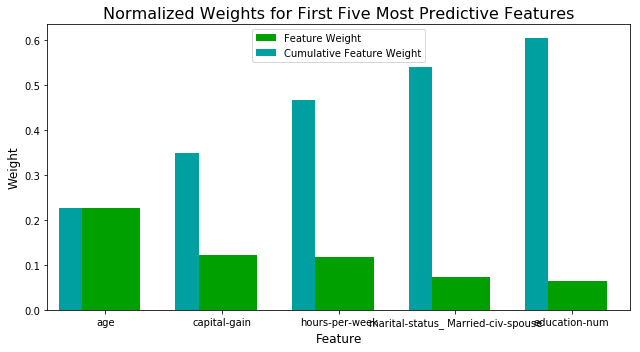

In [12]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
start = time()
model = RandomForestClassifier().fit(X_train, y_train)
end = time()
all_features_time = end - start

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)


### Question 7 - Extracting Feature Importance

Observing the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \`$`50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If I was close to the same answer, how does this visualization confirm my thoughts? 
* If I was not close, why do I think these features are more relevant?

**Answer:

My intuition:
1. `education-num`: Number of educational years completed
2. `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
3. `capital-gain`: Monetary Capital Gains
4. `capital-loss`: Monetary Capital Losses
5. `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

The visualization:
1. `age`: Age
2. `hours-per-week`: Average Hours Per Week Worked
3. `capital-gain`: Monetary Capital Gains
4. `education-num`: Number of educational years completed
5. `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

My assumtions about the most important features for predicticting if an individual makes at most or above 50K were not close to the features from the visualization. Only features `capital-gain` and `education-num` are close to my intuition. The difference between my intuitions and the results from the visualization can be explained by geographical factor. The geographical factor has an impact upon the income and creates a regional pay gap. People’s salaries can vary depending on where they live. For example, in the UK, competitive industry, such as web development, has salary difference of over 50,000 (GBP) depending on location.

**

### Feature Selection


In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))



Final Model trained on full data
------
Accuracy on testing data: 0.8568
F-score on testing data: 0.7235

Final Model trained on reduced data
------
Accuracy on testing data: 0.8478
F-score on testing data: 0.7002


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would I consider using the reduced data as my training set?

**Answer:

Final Model trained on FULL DATA
Accuracy on testing data: 0.8568
F-score on testing data: 0.7235

Final Model trained on REDUCED DATA
Accuracy on testing data: 0.8478
F-score on testing data: 0.7002

As we can see output above, the results from the reduced data are slightly lower than from full data but if training time was a factor, it would be better to use the reduced data as our training set.

**